# Data Analysis and Machine Learning FYS-STK3155/FYS4155 - Project 1 

### Franke function 


\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}


In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed 

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

In [2]:
X = np.arange(0, 1, 0.005)
Y = np.arange(0, 1, 0.005)

n = np.size(X, 0)

In [3]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [4]:
def FindData(x , y):    
    #Franke funksjonen trenger et to dimensjonalt nett av variabler, meshgrid: 
    x_d, y_d = np.meshgrid(x,y)
    z_d = FrankeFunction(x_d, y_d) + 0.05*np.random.randn(n,n)  #+random noise  0.05*np.random.randn(100, 100) 
    return x_d, y_d, z_d 

In [5]:
def convertData(x_d, y_d, z_d):
    #Strekker ut matrisene
    x = x_d.reshape(-1,1)  
    y = y_d.reshape(-1,1)
    z = z_d.reshape(-1,1)
    
    # returnerer også lengden (antall rader) til den nye utstrakte vektoren
    n = np.size(x, 0)
    
    return (x, y, z, n)

In [6]:
def plotSurface(x_d, y_d, z_d):
    # Kode for å plotte overflater, basert på oppgaveteksten 
    fig = plt.figure()
    ax = fig.gca(projection='3d')   
   
    surf = ax.plot_surface(x_d, y_d, z_d, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z - Franke')
    
    # Add a color bar which maps values to colors.
    clb = fig.colorbar(surf, shrink=0.5, aspect=5)
    clb.ax.set_title('Height')

    plt.show()

In [7]:
def XY(x,y):
    # Oppretter designmatrisen/Vandermondes
    xyb = np.c_[np.ones((x.shape)), x, y, x**2, x*y, y**2, x**3, x**2*y, x*y**2, y**3, x**4, x**3*y, x**2*y**2, x*y**3,y**4,
           x**5, x**4*y, x**3*y**2, x**2*y**3, x*y**4, y**5]
    #print(xyb.shape)
    return xyb

In [8]:
def beta_model(model, xyb, z):
    if (model == 'Linear'): 
        # betaLinear: 
        betaLinear = np.linalg.inv(xyb.T.dot(xyb)).dot(xyb.T).dot(z) 
        return betaLinear
    elif (model == 'Ridge'):
        I = np.identity(np.size(xyb, 1)) 
        lambda_R = 0.5
        betaRidge = np.linalg.inv(xyb.T.dot(xyb) + lambda_R*(I)).dot(xyb.T).dot(z)
        return betaRidge 
    elif (model == 'Lasso'):
        #betaLasso = 
        return betaLasso

In [9]:
#trener modellen: 
def predict(xyb,beta,n):
    # Finner utregnet forventet model. 
    zpredict = xyb.dot(beta)
    
    # shapen til x og y må ha like mange punkter, bruker derfor x_d.shape = y_d.shape
    zpredict_mesh = zpredict.reshape(n,n)
    return zpredict, zpredict_mesh

#### Statistical 

In [10]:
def mu(z,n):
    #gjennomsnittsverdien 
    z_mean = (1/n ) * np.sum(z)
    return z_mean
  
def calc_Variance(z, z_mu,n):
    #Sample variance: 
    var_z = (1/n)* sum((z-z_mu)**2) 
    return var_z
        
def MSE(z, z_tilde, n):
    #Mean Squared Error: z = true value, z_tilde = forventet z utifra modell  
    MSE = (1/n)*(sum(z-z_tilde)**2)
    return MSE        
        
def calc_R_2(z, z_tilde, z_mean, n):
    R_2 = 1- ((sum(z.reshape(-1,1)-z_tilde)**2)/(sum((z-z_mean)**2)))
    return R_2

def MSEk(z, z_tilde, n):
    MSE = (1/n)*(sum((z-z_tilde)**2))
    return MSE    

In [11]:
def sigma_2(xyb, z_true, z_predict, N, p): 
    sigma2 = (1/(N-(p-1 )))* (sum(z_true-z_predict)**2)
    
    varBeta = np.linalg.inv(xyb.T.dot(xyb))* sigma2#**2
    
    #Intervall betacoefisienter: 
    s_beta_c_int = np.sqrt(np.diag(varBeta))
    
    return  s_beta_c_int

In [12]:
# Finner Confidens Intervallet
def confidenceIntervall(z_true, z_predict, N, p, xyb, beta):     
    #N = z punkter , p = ant polynom. 
    
    sigma2 = (1/(N-(p-1 ))) * (sum((z_true-z_predict)**2))
    # Betas varians:
    varBeta = np.linalg.inv((xyb.T.dot(xyb)))* sigma2 
    
    # estimert standardavvik pr beta.
    # Må forklares i rapport hvorfor man velger å gjøre det slik og ikke på andre måter. 
    betaCoeff = (np.sqrt(np.diag(varBeta))).reshape(-1,1)
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-betaCoeff, beta+betaCoeff]    
    return beta, betaCoeff, beta_confInt 

In [13]:

def confidenceIntervall2(z_true, N, p, xyb, beta):     
    #N = z punkter , p = ant polynom. 
    z_mean = (1/N ) * np.sum(z_true)
    sigma2 = (1/(N-(p-1 ))) * (sum((z_true-z_mean)**2))
    # Betas varians:
    varBeta = np.linalg.inv((xyb.T.dot(xyb)))* sigma2 
    
    # estimert standardavvik pr beta.
    # Må forklares i rapport hvorfor man velger å gjøre det slik og ikke på andre måter. 
    betaCoeff = (np.sqrt(np.diag(varBeta))).reshape(-1,1)
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-betaCoeff, beta+betaCoeff]    
    return beta, betaCoeff, beta_confInt 




In [14]:
# Finner modellens bias og varians:
def bias(z_true, z_predict, N):    
    bias2 = np.sum((z_true - np.mean(z_predict))**2 )/N
    return bias2

def var2(z_predict, N): 
    var = np.sum((z_predict - np.mean(z_predict))**2)/N
    return var

### Oppretter train/testdata: 

In [15]:
# deler datasettet i tre. en testdel og resten train. 30/70 
def test(x,y,z, model): 
    # Oppretter en matrise av x, y og z. Datasettet deles deretter i test og train. 
    data = np.concatenate((x, y, z), axis = 1) 

    n = np.size(data, 0) #rader
    m = np.size(data, 1) #kolonner
    
    # Shuffle dataset: 
    np.random.shuffle(data)
    
    # datasettet deles i 3 - en del test og to treningsdel 
    split_dataset = np.array_split(data,3) 
    test = split_dataset[0]
    train = np.concatenate((split_dataset[1], split_dataset[2]), axis = 0)
        
    # TRENING: 
    # Når hele datasettet er gått igjennom en hel iterasjon så trener man på train settet 
    #1. Finner designmatrisen, xyb: 
    xyb_train = XY(train[:,0],train[:,1])

    #2. Finner beta av treningsettet med treningsettets designmatrise og treningsdelens z-verdier.  
    beta = beta_model(model, xyb_train, train[:,2]) 

    # TEST:
    # Designmatrisen opprettes for testsettet 
    xyb_test = XY(test[:,0],test[:,1])

    nr =  np.size(test[:,2],0)

    # Finner forventet z_verdier for testsettet ved å bruke utregnet modell, beta, over og testsettets x og y verdier fra xyb-matrisa. 
    zpredict_test = xyb_test.dot(beta)
    
    # regner ut mean squared error 
    mse = MSEk(test[:,2], zpredict_test, nr) 
    
    z_mean = (1/nr ) * np.sum(test[:,2])
    
    # Regner ut R_2 score:  
    R_2 = 1 - (((sum(test[:,2]-zpredict_test))**2)/(sum((test[:,2]-z_mean)**2)))
           
    betaCoeff = sigma_2(xyb_test,test[:,2], zpredict_test, nr, 5)
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-betaCoeff, beta+betaCoeff]
    
    #bias: 
    biasModel = bias(test[:,2], zpredict_test, nr)
    #varians: 
    var = var2(zpredict_test, nr)
    
    #print (beta_confInt )
    return mse, R_2, biasModel, var, beta_confInt     

### Cross-Validation
#### K-fold 

In [16]:
def k_fold(x,y,z, k, model): 
    # Oppretter en matrise av x, y og z. Datasettet som skal crossvalideres
    data = np.concatenate((x, y, z), axis = 1) 

    n = np.size(data, 0) #rader
    m = np.size(data, 1) #kolonner

    # Shuffle dataset: 
    np.random.shuffle(data)

    mse = 0
    r2 = 0
    
    betaCoeff = 0
    bias = 0 
    varianceModel = 0 
    
    #splitter dataset i k like deler. Oppretter antall folder. Bruker array_split. Da blir k deler blir ikke eksakt like,
    #men tilnærmet like, stort datasett gir lite forskjell. 
    split_dataset = np.array_split(data,k) 
    #Definerer alle k gangene datasettet skal deles opp. 
    for i in range(0, k): 
        # resetter train før hver oppdeling av datasettet.  
        train = np.zeros((0,3))

        # j definerer selve splittdelene og man bestemmer her om del j er en trenings eller test del. 
        for j in range(0,k): 
            if j == i:
                test = split_dataset[j]
                continue
            train = np.concatenate((train, split_dataset[j]), axis = 0)
        print(train.shape)
        
        # TRENING: 
        # Når hele datasettet er gått igjennom en hel iterasjon så trener man på train settet 
        #1. Finner designmatrisen, xyb: 
        xyb_train = XY(train[:,0],train[:,1])
        
        #2. Finner beta av treningsettet med treningsettets designmatrise og treningsdelens z-verdier.  
        beta = beta_model(model, xyb_train, train[:,2]) 

        # TEST:
        # Designmatrisen opprettes for testsettet 
        xyb_test = XY(test[:,0],test[:,1])
        
        nr =  np.size(test[:,2],0)

        # Finner forventet z_verdier for testsettet ved å bruke utregnet modell, beta, over og testsettets x og y verdier fra xyb-matrisa. 
        zpredict_test = xyb_test.dot(beta)
        
        # regner ut mean squared error pr fold  
        part_mse = MSEk(test[:,2], zpredict_test, nr) 
        mse = mse + part_mse

        z_mean = (1/nr ) * np.sum(test[:,2])
        
        # Regner ut R_2 score pr fold:   
        R_2 = 1 - (((sum(test[:,2]-zpredict_test))**2)/(sum((test[:,2]-z_mean)**2)))
        r2 = r2 + R_2
        
        #Finner betacoeffisientenes varians 
        betaCoeffpart = sigma_2(xyb_test,test[:,2], zpredict_test, nr, 5)
        
        betaCoeff = betaCoeff + betaCoeffpart         
        
        #bias: 
        #biaspart = bias(test[:,2], zpredict_test, nr)
        #varians: 
        varpart = var2(zpredict_test, nr)
             
        varianceModel = varianceModel + varpart
        
        #resetter: 
        varpart = 0
        betaCoeffpart = 0
        part_mse = 0
        nr = 0
        R_2 = 0
        
    # Beregnet mean squared error og R_2 etter cross-validation med k-fold :
    total_MSE = (mse/k)
    total_R_2 = (r2/k)
    totVarianceModel = varianceModel/k
    #Intervall betacoefisienter: 
    beta_confInt = np.c_[beta-(betaCoeff/k), beta+(betaCoeff/k)]
    return total_MSE, total_R_2, totVarianceModel , beta_confInt

In [17]:
def k_fold_Lasso(x,y,z, k, Lasso_alpha): 
    # Oppretter en matrise av x, y og z. Datasettet som skal crossvalideres
    data = np.concatenate((x, y, z), axis = 1) 

    n = np.size(data, 0) #rader
    m = np.size(data, 1) #kolonner

    # Shuffle dataset: 
    np.random.shuffle(data)

    mse = 0
    r2 = 0
    
    #splitter dataset i k like deler. Oppretter antall folder. Bruker array_split. Da blir k deler blir ikke eksakt like,
    #men tilnærmet like, stort datasett gir lite forskjell. 
    split_dataset = np.array_split(data,k) 
    #Definerer alle k gangene datasettet skal deles opp. 
    for i in range(0, k): 
        # resetter train før hver oppdeling av datasettet.  
        train = np.zeros((0,3))

        # j definerer selve splittdelene og man bestemmer her om del j er en trenings eller test del. 
        for j in range(0,k): 
            if j == i:
                test = split_dataset[j]
                continue
            train = np.concatenate((train, split_dataset[j]), axis = 0)
        print(train.shape)
        
        #Lasso_multi = np.c_[x_Lasso, y_Lasso]
        #Lasso_multi - Putter alt treningsettet i en multivariabel som sendes til sklearn sin Lassometode. 
        Lasso_multi = np.c_[train[:,0], train[:,1]]
        Lasso_multi_test = np.c_[test[:,0],test[:,1]]
        
        poly2 = PolynomialFeatures(degree=10)
        
        # Transformerer variabelmatrisen 
        Lasso_sklearn = poly2.fit_transform(Lasso_multi)
        Lasso_sklearn_test = poly2.fit_transform(Lasso_multi_test)

        #print(Lasso_sklearn)
        
        # Beregner Lasso modell 
        lasso = linear_model.Lasso(alpha=Lasso_alpha)
        lasso.fit(Lasso_sklearn, train[:,2]) 

        # beregner forventet z-verdier av x og y verdier
        zpredict_test_L = lasso.predict(Lasso_sklearn_test)
        
        nrx =  np.size(test[:,0],0)
        nry =  np.size(test[:,1],0)
        nr =  np.size(test[:,2],0)

        # Finner forventet z_verdier for testsettet ved å bruke utregnet modell, beta, over og testsettets x og y verdier fra xyb-matrisa. 
        
        
        # regner ut mean squared error pr fold  
        part_mse = MSEk(test[:,2], zpredict_test_L, nr) 
        mse = mse + part_mse

        
        
        z_mean = (1/nr ) * np.sum(test[:,2])
        
        # Regner ut R_2 score pr fold:   
        R_2 = 1 - (((sum(test[:,2]-zpredict_test_L))**2)/(sum((test[:,2]-z_mean)**2)))
        r2 = r2 + R_2
        
        #x_d = test[:,0].reshape(nrx,nrx)
        #y_d =test[:,1].reshape(nry,nry)
        #z_d = zpredict_test_L.reshape(nr,nr)
        
        #plotSurface(x_d, y_d, z_d)
        
        part_mse = 0
        nr = 0
        R_2 = 0
    # Beregnet mean squared error og R_2 etter cross-validation med k-fold :
    total_MSE = (mse/k)
    total_R_2 = (r2/k)
    return total_MSE, total_R_2

## Part a) 
### Linear Regression 

(200, 200)


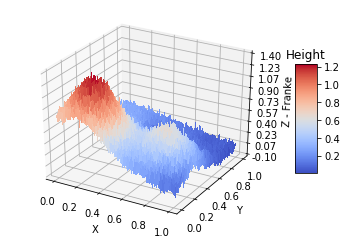

In [18]:
#Henter meshgrid verdier av datasettet 
x_d_OLS, y_d_OLS, z_d_OLS = FindData(X, Y) 
print(x_d_OLS.shape)
# Plotter ekte overflate 
plotSurface(x_d_OLS, y_d_OLS, z_d_OLS) 

In [19]:
#Konverterer meshgrideverdiene til kolonnevektorer
x_OLS,y_OLS,z_OLS,m_OLS = convertData(x_d_OLS, y_d_OLS, z_d_OLS)
print(m_OLS)
print(x_OLS.shape)
# Finner designmatrisen for datasettet 
xyb_Linear = XY(x_OLS,y_OLS) 
# Finner modellen 
betaLinear = beta_model('Linear', xyb_Linear, z_OLS) 
print(betaLinear.shape)

40000
(40000, 1)
(21, 1)


### Confidence Intervall med z_mean: 
Hvordan skal dette regnes ut og hva slags parametre skal velges. Brukes z_predict(confidenceIntervall) eller z_mean (confidenceIntervall2)? 

In [20]:
print(confidenceIntervall2(z_OLS, m_OLS, 5, xyb_Linear, betaLinear ))

(array([[  0.39568135],
       [  7.81870734],
       [  3.84895167],
       [-33.93217618],
       [-15.28938564],
       [ -9.0043068 ],
       [ 46.80075066],
       [ 44.80520796],
       [ 21.44226556],
       [ -7.47038189],
       [-21.51306216],
       [-53.93458885],
       [ -7.69048915],
       [-30.82889579],
       [ 28.76579758],
       [  0.45162569],
       [ 19.46641545],
       [ 10.18348818],
       [ -5.00446748],
       [ 17.10493159],
       [-16.35709511]]), array([[0.02429999],
       [0.27130293],
       [0.27130293],
       [1.31022853],
       [1.0237452 ],
       [1.31022853],
       [2.95091897],
       [2.1887661 ],
       [2.1887661 ],
       [2.95091897],
       [3.09423954],
       [2.36465059],
       [2.20108197],
       [2.36465059],
       [3.09423954],
       [1.21947728],
       [1.06110025],
       [1.03537245],
       [1.03537245],
       [1.06110025],
       [1.21947728]]), array([[  0.37138137,   0.41998134],
       [  7.54740442,   8.09001027

### Regner ut z_predict 

In [21]:
# regner ut forventet verdi ut ifra datasettet og forventet modell
zpredict_OLS, zpredict_OLS_mesh = predict(xyb_Linear,betaLinear,n)
print(zpredict_OLS.shape)

print(zpredict_OLS_mesh.shape)
print(n)

(40000, 1)
(200, 200)
200


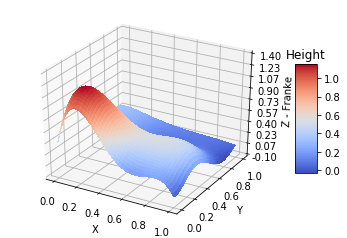

In [22]:
# Plotter forventet overflate  
plotSurface(x_d_OLS, y_d_OLS, zpredict_OLS_mesh)

### Confidence Intervall med z_predict: 

In [23]:
#betaCoeff = 
print(confidenceIntervall(z_OLS, zpredict_OLS, m_OLS, 5, xyb_Linear, betaLinear ))

#beta_confInt = np.c_[betaLinear-betaCoeff, betaLinear+betaCoeff]

#print(betaCoeff.shape)

(array([[  0.39568135],
       [  7.81870734],
       [  3.84895167],
       [-33.93217618],
       [-15.28938564],
       [ -9.0043068 ],
       [ 46.80075066],
       [ 44.80520796],
       [ 21.44226556],
       [ -7.47038189],
       [-21.51306216],
       [-53.93458885],
       [ -7.69048915],
       [-30.82889579],
       [ 28.76579758],
       [  0.45162569],
       [ 19.46641545],
       [ 10.18348818],
       [ -5.00446748],
       [ 17.10493159],
       [-16.35709511]]), array([[0.00559235],
       [0.06243706],
       [0.06243706],
       [0.3015331 ],
       [0.23560246],
       [0.3015331 ],
       [0.67911797],
       [0.50371779],
       [0.50371779],
       [0.67911797],
       [0.71210144],
       [0.54419546],
       [0.50655214],
       [0.54419546],
       [0.71210144],
       [0.2806478 ],
       [0.24419926],
       [0.23827833],
       [0.23827833],
       [0.24419926],
       [0.2806478 ]]), array([[  0.39008901,   0.4012737 ],
       [  7.75627029,   7.8811444 

In [24]:
# Regner ut gjennomsnittsverdien, variansen, mean squared error og standardavviket 
z_mean_OLS = mu(z_OLS,m_OLS)
print(z_mean_OLS)   
var_z_OLS = calc_Variance(z_OLS,z_mean_OLS,m_OLS)
print(var_z_OLS)        
MSE_OLS = MSE(z_OLS, zpredict_OLS, m_OLS)
print(MSE_OLS)      
R_2_OLS = calc_R_2(z_OLS, zpredict_OLS, z_mean_OLS, m_OLS)
print(R_2_OLS)

0.40912791373675433
[0.08503015]
[3.76678162e-19]
[1.]


In [25]:
print(m_OLS)
print(xyb_Linear.shape)
print(betaLinear.shape)

40000
(40000, 21)
(21, 1)


### Resampler settet en gang

In [26]:
# #### Tester med nye random punkter: 

In [27]:
mse, R_2, biasModel, var, beta_confInt = test(x_OLS,y_OLS,z_OLS,'Linear')
print('Mean squared error: ', mse)
print('R 2- score: ', R_2)
print('bias for the model ', biasModel) 
print('Variancen for the model: ', var)
print('beta Confidence Intervall: \n', beta_confInt)

Mean squared error:  0.004578952672597578
R 2- score:  0.8837033668356015
bias for the model  0.08520712408301771
Variancen for the model:  0.08071629571073693
beta Confidence Intervall: 
 [[  0.38414721   0.4128218 ]
 [  7.62588518   7.94981061]
 [  3.6945424    4.00991336]
 [-34.62028628 -33.05703218]
 [-15.79222726 -14.58285978]
 [ -9.83208898  -8.29737862]
 [ 45.06593702  48.58134628]
 [ 42.92527659  45.51731033]
 [ 20.33848012  22.92967498]
 [ -9.15802671  -5.67926096]
 [-23.57877215 -19.8955552 ]
 [-54.75449458 -51.93548737]
 [ -8.71955456  -6.10737235]
 [-32.54914358 -29.75806996]
 [ 26.97041453  30.62799602]
 [ -0.13806062   1.31370622]
 [ 18.72857728  19.99773701]
 [  9.19016069  10.41722202]
 [ -5.44047221  -4.21267732]
 [ 16.53362002  17.77687356]
 [-17.10704388 -15.6653927 ]]


### Tester med crossvalidation: 

In [28]:
# Cross-Validation med utstrekte kolonnevektorer av datasettet, splitter 3 ganger og bruker OLS 
total_MSE, total_R_2, totVarianceModel , beta_confInt = k_fold(x_OLS,y_OLS,z_OLS, 3, 'Linear')
print('Results after k fold: ')
print('Estimated mean squared error: ', total_MSE)
print('R 2- score: ', total_R_2)
print('bias for the model ', biasModel) 
print('Variancen for the model: ', totVarianceModel)
print('beta Confidence Intervall: \n', beta_confInt)

(26666, 3)
(26667, 3)
(26667, 3)
Results after k fold: 
Estimated mean squared error:  0.004511339924492895
R 2- score:  0.9243033367136148
bias for the model  0.08520712408301771
Variancen for the model:  0.08053303844667348
beta Confidence Intervall: 
 [[ 3.95011420e-01  4.17021422e-01]
 [ 7.61422579e+00  7.85918981e+00]
 [ 3.67297573e+00  3.91863200e+00]
 [-3.43055078e+01 -3.31221425e+01]
 [-1.54008891e+01 -1.44761192e+01]
 [-9.55582361e+00 -8.36913105e+00]
 [ 4.52819922e+01  4.79485751e+01]
 [ 4.29833591e+01  4.49615527e+01]
 [ 2.01415290e+01  2.21205456e+01]
 [-8.73169203e+00 -6.05814024e+00]
 [-2.29234245e+01 -2.01260956e+01]
 [-5.42184748e+01 -5.20785276e+01]
 [-8.14918253e+00 -6.16001789e+00]
 [-3.19124738e+01 -2.97721697e+01]
 [ 2.72658693e+01  3.00707733e+01]
 [-4.84892708e-02  1.05441274e+00]
 [ 1.87331461e+01  1.96948810e+01]
 [ 9.44731483e+00  1.03846142e+01]
 [-5.52311514e+00 -4.58511574e+00]
 [ 1.66848828e+01  1.76467725e+01]
 [-1.68870402e+01 -1.57808252e+01]]


In [29]:
print(z_OLS.shape)

(40000, 1)


#### Finn bias og variansen for modellene. 

In [30]:
bias2 = bias(z_OLS, zpredict_OLS, m_OLS)
print(bias2)
varianceModel = var2(zpredict_OLS, m_OLS)
print(varianceModel)

0.08503014679792444
0.08052666098966832


## Part b) Ridge  
#### Ridge Regression on the Franke function med resampling 

(200, 200)


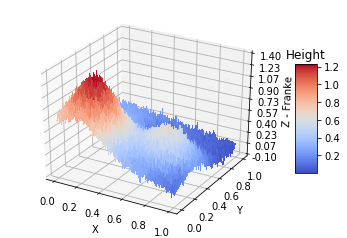

In [31]:
x_d_Ridge, y_d_Ridge, z_d_Ridge = FindData(X , Y) 
print(x_d_Ridge.shape)
plotSurface(x_d_Ridge, y_d_Ridge, z_d_Ridge) 

In [32]:
x_Ridge, y_Ridge, z_Ridge, m = convertData(x_d_Ridge, y_d_Ridge, z_d_Ridge)
print(n)
print(m)
xyb_Ridge = XY(x_Ridge, y_Ridge) 
betaRidge = beta_model('Ridge', xyb_Ridge, z_Ridge)

200
40000


In [33]:
zpredict_Ridge, zpredict_Ridge_mesh = predict(xyb_Ridge ,betaRidge, n)
print(zpredict_Ridge_mesh.shape)

(200, 200)


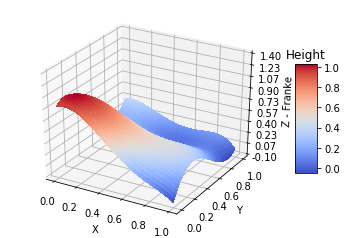

In [34]:
# Plot the predicted surface.
plotSurface(x_d_Ridge, y_d_Ridge, zpredict_Ridge_mesh)

In [35]:
print(confidenceIntervall(z_Ridge, zpredict_Ridge, m, 5, xyb_Ridge, betaRidge ))

(array([[ 0.922875  ],
       [ 0.7191937 ],
       [ 1.1501924 ],
       [-5.46423177],
       [ 1.13489502],
       [-5.20719088],
       [ 3.34261004],
       [ 1.48559907],
       [-1.27676242],
       [ 1.54251989],
       [ 3.40065987],
       [ 0.86086532],
       [ 0.61110297],
       [-0.46170407],
       [ 3.29202537],
       [-2.98997584],
       [-1.79659024],
       [ 0.31081906],
       [-0.50925622],
       [ 0.22186401],
       [-1.30440256]]), array([[0.00742096],
       [0.08285299],
       [0.08285299],
       [0.4001297 ],
       [0.31264077],
       [0.4001297 ],
       [0.9011789 ],
       [0.66842562],
       [0.66842562],
       [0.9011789 ],
       [0.94494746],
       [0.72213885],
       [0.67218675],
       [0.72213885],
       [0.94494746],
       [0.37241524],
       [0.3240486 ],
       [0.31619161],
       [0.31619161],
       [0.3240486 ],
       [0.37241524]]), array([[ 9.15454045e-01,  9.30295955e-01],
       [ 6.36340701e-01,  8.02046689e-01],
      

In [36]:
# Regner ut gjennomsnittsverdien, variansen, mean squared error og standardavviket 
z_mean_Ridge = mu(z_Ridge,m)
print(z_mean_Ridge)   
print(m)
var_z_Ridge = calc_Variance(z_Ridge,z_mean_Ridge,m)
print(var_z_Ridge)        
MSE_Ridge = MSE(z_Ridge, zpredict_Ridge, m)
print(MSE_Ridge)      
R_2_Ridge = calc_R_2(z_Ridge, zpredict_Ridge, z_mean_Ridge, m)
print(R_2_Ridge)

0.40864415870453585
40000
[0.08475597]
[5.32311414e-06]
[0.99993719]


In [37]:
mse_R, R_2_R, biasModel_R, var_R, beta_confInt_R = test(x_Ridge, y_Ridge, z_Ridge, 'Ridge')

print('Mean squared error: ', mse_R)
print('R 2- score: ', R_2_R)
print('bias for the model ', biasModel_R) 
print('Variancen for the model: ', var_R)
print('beta Confidence Intervall: \n', beta_confInt_R)

Mean squared error:  0.00848631189395614
R 2- score:  0.9278782837139522
bias for the model  0.08385986579587522
Variancen for the model:  0.07335491448859674
beta Confidence Intervall: 
 [[ 0.9488094   0.97100616]
 [ 0.25740557  0.50927519]
 [ 0.79286743  1.04111958]
 [-5.03380353 -3.8170434 ]
 [ 0.75413432  1.70587831]
 [-5.07860975 -3.87586563]
 [ 1.2738196   4.0116621 ]
 [ 0.24926578  2.29104629]
 [-2.21333927 -0.18391243]
 [-0.29437729  2.41765616]
 [ 1.31262222  4.17991137]
 [-0.23379438  1.96564134]
 [-0.68779274  1.36245234]
 [-1.46976882  0.71101728]
 [ 1.23183683  4.07260517]
 [-2.93490683 -1.80645987]
 [-2.01028813 -1.02918183]
 [-0.33048941  0.62655554]
 [-0.70109746  0.25573663]
 [-0.38784348  0.58884447]
 [-1.25590171 -0.13828773]]


#### Endrer datasett til trening og test sett:

In [38]:
# Cross-Validation med utstrekte kolonnevektorer av datasettet, splitter 3 ganger og bruker OLS 
total_MSE_R, total_R_2_R, totVarianceModel_R , beta_confInt_R_k = k_fold(x_Ridge, y_Ridge, z_Ridge, 3, 'Ridge')
print('Results after k fold: ')
print('Estimated mean squared error: ', total_MSE_R)
print('R 2- score: ', total_R_2_R)
#print('bias for the model ', ) 
print('Variancen for the model: ', totVarianceModel_R)
print('beta Confidence Intervall: \n', beta_confInt_R_k)


(26666, 3)
(26667, 3)
(26667, 3)
Results after k fold: 
Estimated mean squared error:  0.008518907196948521
R 2- score:  0.9364414632046296
Variancen for the model:  0.07333390032824359
beta Confidence Intervall: 
 [[ 0.94926876  0.96911915]
 [ 0.26466353  0.48560971]
 [ 0.81370631  1.03348708]
 [-4.92476949 -3.86308234]
 [ 0.83382829  1.66488397]
 [-5.03775688 -3.97909736]
 [ 1.41823222  3.80516534]
 [ 0.36950341  2.14491947]
 [-2.06617882 -0.29961754]
 [-0.11679808  2.26367009]
 [ 1.48283516  3.98426813]
 [-0.13045224  1.78023492]
 [-0.53260513  1.24838848]
 [-1.34271535  0.56270347]
 [ 1.42917795  3.92249974]
 [-2.83712919 -1.85163565]
 [-1.94601786 -1.08933425]
 [-0.22854513  0.60968749]
 [-0.65365145  0.18073196]
 [-0.35641368  0.49866694]
 [-1.19405389 -0.21199026]]


#### Finn bias og variansen for modellene. 

In [39]:
bias2 = bias(z_Ridge, zpredict_Ridge, m)
print(bias2)
varianceModel = var2(zpredict_Ridge, m)
print(varianceModel)

0.0847559673342544
0.07392661303535016


## Part c) Lasso 

(200, 200)


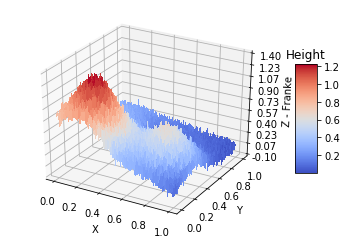

In [40]:
# Oppretter meshgrid av datasettet 
x_d_Lasso, y_d_Lasso, z_d_Lasso = FindData(X , Y) 
print(x_d_Lasso.shape)
# Plotter z_d med meshgrid av x og y
plotSurface(x_d_Lasso, y_d_Lasso, z_d_Lasso) 

In [41]:
# Konverterer meshgrid til kolonnevektorer
x_Lasso, y_Lasso, z_Lasso, m = convertData(x_d_Lasso, y_d_Lasso, z_d_Lasso)
print(n)
print(m)
# Oppretter independent variabel matrise av x og y vektorene
Lasso_multi = np.c_[x_Lasso, y_Lasso]
#print (Lasso_multi)

200
40000


In [42]:
# Bruker sklearn for å finne Lasso-modell. Bruker PolynomialFeatures for ikke lineær funksjon
poly2 = PolynomialFeatures(degree=10)

# Transformerer variabelmatrisen 
Lasso_sklearn = poly2.fit_transform(Lasso_multi)
print(Lasso_sklearn)
#print(z_Lasso)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.005      0.         ... 0.         0.         0.        ]
 [1.         0.01       0.         ... 0.         0.         0.        ]
 ...
 [1.         0.985      0.995      ... 0.93208841 0.94155123 0.95111013]
 [1.         0.99       0.995      ... 0.94157525 0.94633068 0.95111013]
 [1.         0.995      0.995      ... 0.95111013 0.95111013 0.95111013]]


In [43]:
# Beregner Lasso modell 
lasso=linear_model.Lasso(alpha=0.001)
lasso.fit(Lasso_sklearn, z_Lasso) 

# beregner forventet z-verdier av x og y verdier
predictLasso = lasso.predict(Lasso_sklearn)

print("Lasso Coefficient: ", lasso.coef_)
print("Lasso Intercept: ", lasso.intercept_)

Lasso Coefficient:  [ 0.         -0.65412527 -0.         -0.15975703  0.1151463  -1.22276507
 -0.          0.53714028  0.         -0.         -0.          0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.3342021
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.22803803 -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.        ]
Lasso Intercept:  [1.00942549]


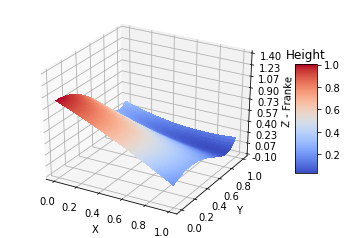

In [44]:
# Plotter forventet overflate med Lasso modellen 
predict_mesh_Lasso = predictLasso.reshape(n,n)
plotSurface(x_d_Lasso, y_d_Lasso, predict_mesh_Lasso)

Kommentar til Lasso: 
Ser at ved å endre på alpha til veldig liten så begynner Lasso og ligne mer og mer på originale surfacen. 
ved alpha = 0.1 så synes bare et grått plan. 
Koeffisientene endres også ved å endre på alpha. Det samme med intercept. 

In [45]:
k_fold_Lasso(x_Lasso, y_Lasso, z_Lasso, 4, 0.001)

(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)


(0.015341352711449537, 0.7389113017162582)

## Part d) 

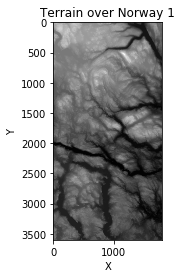

In [46]:
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('Data/SRTM_data_Norway_1.tif')
#terrain1 = imread('Data/SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

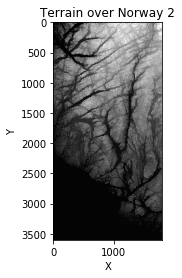

In [47]:
# Load the terrain
terrain2 = imread('Data/SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 2')
plt.imshow(terrain2, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Part e) 

In [48]:
# Velg ett område, f.eks 100x100 som tilsvarer X og Y. se på intensiteten på bildet. 

patch 1, from (1466, 886) to (2266, 1286)
mse: 38484.4
R2: 0.533812
variance: 44066.8
bias: 82551.2

patch 2, from (1062, 499) to (1862, 899)
mse: 11912.9
R2: 0.44506
variance: 9554.11
bias: 21467

patch 3, from (2552, 859) to (3352, 1259)
mse: 7394.8
R2: 0.77824
variance: 25951.1
bias: 33345.9

patch 4, from (962, 967) to (1762, 1367)
mse: 37333
R2: 0.416821
variance: 26683.4
bias: 64016.4

patch 5, from (183, 934) to (983, 1334)
mse: 35475.5
R2: 0.334222
variance: 17808.8
bias: 53284.3

The whole dataset
mse: 42617.3
R2: 0.537315
variance: 49491.5
bias: 92108.8



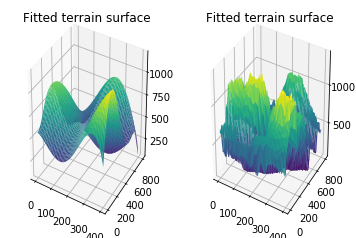

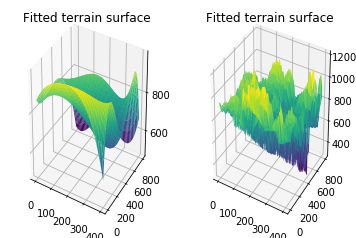

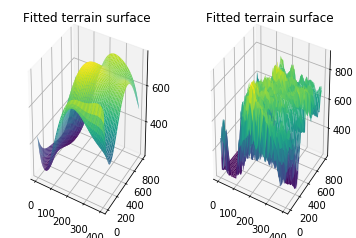

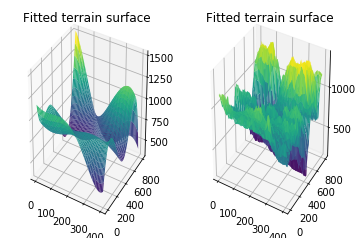

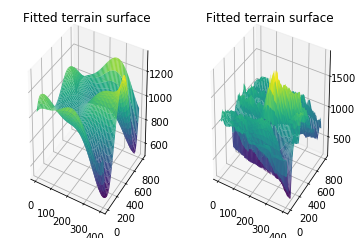

In [49]:
# Kode fra Kristine 

import numpy as np
#from scipy.misc import imread
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def surface_plot(surface,title, surface1=None):
    M,N = surface.shape

    ax_rows = np.arange(M)
    ax_cols = np.arange(N)

    [X,Y] = np.meshgrid(ax_cols, ax_rows)

    fig = plt.figure()
    if surface1 is not None:
        ax = fig.add_subplot(1,2,1,projection='3d')
        ax.plot_surface(X,Y,surface,cmap=cm.viridis,linewidth=0)
        plt.title(title)

        ax = fig.add_subplot(1,2,2,projection='3d')
        ax.plot_surface(X,Y,surface1,cmap=cm.viridis,linewidth=0)
        plt.title(title)
    else:
        ax = fig.gca(projection='3d')
        ax.plot_surface(X,Y,surface,cmap=cm.viridis,linewidth=0)
        plt.title(title)


def predict(rows, cols, beta):
    out = np.zeros((np.size(rows), np.size(cols)))

    for i,y_ in enumerate(rows):
        for j,x_ in enumerate(cols):
            data_vec = np.array([1, x_, y_, x_**2, x_*y_, y_**2, \
                                x_**3, x_**2*y_, x_*y_**2, y_**3, \
                                x_**4, x_**3*y_, x_**2*y_**2, x_*y_**3,y_**4, \
                                x_**5, x_**4*y_, x_**3*y_**2, x_**2*y_**3,x_*y_**4,y_**5])#,\
                            #    x_**6, x_**5*y_, x_**4*y_**2, x_**3*y_**3,x_**2*y_**4, x_*y_**5, y_**6, \
                            #    x_**7, x_**6*y_, x_**5*y_**2, x_**4*y_**3,x_**3*y_**4, x_**2*y_**5, x_*y_**6, y_**7, \
                            #    x_**8, x_**7*y_, x_**6*y_**2, x_**5*y_**3,x_**4*y_**4, x_**3*y_**5, x_**2*y_**6, x_*y_**7,y_**8, \
                            #    x_**9, x_**8*y_, x_**7*y_**2, x_**6*y_**3,x_**5*y_**4, x_**4*y_**5, x_**3*y_**6, x_**2*y_**7,x_*y_**8, y_**9])
            out[i,j] = data_vec @ beta

    return out

from sklearn.metrics import mean_squared_error

if __name__ == '__main__':

    # Load the terrain
    terrain1 = imread('data/SRTM_data_Norway_1.tif')
    [n,m] = terrain1.shape

    ## Find some random patches within the dataset and perform a fit

    #patch_size_row = 100
    #patch_size_col = 50

    patch_size_row = 800
    patch_size_col = 400
    
    # Define their axes
    rows = np.linspace(0,1,patch_size_row)
    cols = np.linspace(0,1,patch_size_col)

    [C,R] = np.meshgrid(cols,rows)

    x = C.reshape(-1,1)
    y = R.reshape(-1,1)

    num_data = patch_size_row*patch_size_col

    # Find the start indices of each patch

    num_patches = 5

    np.random.seed(4155)

    row_starts = np.random.randint(0,n-patch_size_row,num_patches)
    col_starts = np.random.randint(0,m-patch_size_col,num_patches)

    for i,row_start, col_start in zip(np.arange(num_patches),row_starts, col_starts):
        row_end = row_start + patch_size_row
        col_end = col_start + patch_size_col

        patch = terrain1[row_start:row_end, col_start:col_end]

        z = patch.reshape(-1,1)

        # Perform OLS fit
        data = np.c_[np.ones((num_data,1)), x, y, \
                     x**2, x*y, y**2, \
                     x**3, x**2*y, x*y**2, y**3, \
                     x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                     x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]#, \
                     #x**6, x**5*y, x**4*y**2, x**3*y**3,x**2*y**4, x*y**5, y**6, \
                     #x**7, x**6*y, x**5*y**2, x**4*y**3,x**3*y**4, x**2*y**5, x*y**6, y**7, \
                     #x**8, x**7*y, x**6*y**2, x**5*y**3,x**4*y**4, x**3*y**5, x**2*y**6, x*y**7,y**8, \
                     #x**9, x**8*y, x**7*y**2, x**6*y**3,x**5*y**4, x**4*y**5, x**3*y**6, x**2*y**7,x*y**8, y**9]

        beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

        fitted_patch = predict(rows, cols, beta_ols)

        mse = np.sum( (fitted_patch - patch)**2 )/num_data
        R2 = 1 - np.sum( (fitted_patch - patch)**2 )/np.sum( (patch - np.mean(patch))**2 )
        var = np.sum( (fitted_patch - np.mean(fitted_patch))**2 )/num_data
        bias = np.sum( (patch - np.mean(fitted_patch))**2 )/num_data

        print("patch %d, from (%d, %d) to (%d, %d)"%(i+1, row_start, col_start, row_end,col_end))
        print("mse: %g\nR2: %g"%(mse, R2))
        print("variance: %g"%var)
        print("bias: %g\n"%bias)

        surface_plot(fitted_patch,'Fitted terrain surface',patch)

    # Perform fit over the whole dataset
    print("The whole dataset")

    rows = np.linspace(0,1,n)
    cols = np.linspace(0,1,m)

    [C,R] = np.meshgrid(cols,rows)

    x = C.reshape(-1,1)
    y = R.reshape(-1,1)

    num_data = n*m

    data = np.c_[np.ones((num_data,1)), x, y, \
                 x**2, x*y, y**2, \
                 x**3, x**2*y, x*y**2, y**3, \
                 x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                 x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]

    z = terrain1.flatten()
    
    beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

    fitted_terrain = predict(rows, cols, beta_ols)

    mse = np.sum( (fitted_terrain - terrain1)**2 )/num_data
    R2 = 1 - np.sum( (fitted_terrain - terrain1)**2 )/np.sum( (terrain1- np.mean(terrain1))**2 )
    var = np.sum( (fitted_terrain - np.mean(fitted_terrain))**2 )/num_data
    bias = np.sum( (terrain1 - np.mean(fitted_terrain))**2 )/num_data

    print("mse: %g\nR2: %g"%(mse, R2))
    print("variance: %g"%var)
    print("bias: %g\n"%bias)

    plt.show()